In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("homeprices_multi.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df.bedrooms.median()

4.0

In [7]:
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


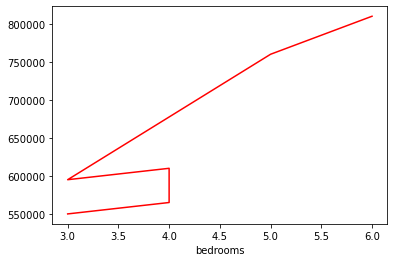

In [13]:
plt.xlabel("bedrooms")
plt.plot(df.bedrooms,df.price,color='red')

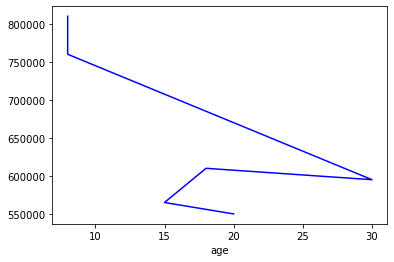

In [14]:
plt.xlabel("age")
plt.plot(df.age,df.price,color='blue')

In [15]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [16]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [17]:
reg.intercept_

221323.00186540384

In [18]:
reg.predict([[3000,3,20]])

array([563042.60975297])

In [19]:
reg.predict([[5000,4,5]])

array([859032.14234467])

### Excercise Description
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [21]:
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
#  mean is in decimal then we can use math lib
import math
mean_testscore =math.floor(df['test_score(out of 10)'].mean())
mean_testscore

7

In [39]:
new_df=df.fillna({
    'experience':'zero',
    'test_score(out of 10)':mean_testscore
})
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [31]:
from word2number import w2n

In [33]:
print(w2n.word_to_num("two million three thousand nine hundred and eighty four"))

2003984


In [42]:
new_df.experience=new_df.experience.apply(w2n.word_to_num)
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [44]:
reg=linear_model.LinearRegression()
reg.fit(new_df[['experience','test_score(out of 10)','interview_score(out of 10)']],new_df['salary($)'])

LinearRegression()

In [46]:
# 2 yr experience, 9 test score, 6 interview score
reg.predict([[2,9,6]])

array([53713.86677124])

In [47]:
# 12 yr experience, 10 test score, 10 interview score
reg.predict([[12,10,10]])

array([93747.79628651])

In [1]:
# saving your model to export for later use
import pickle

In [ ]:
# saving or importing ur model
with open('model_pickle','wb') as f:
    pickle.dump(model,f) # model: ur model name or object

In [ ]:
# reading or exporting ur model
with open('model_pickle','rb') as f:
    mp=pickle.load(f) # mp is model object  

In [ ]:
# mp.predict(55000)

In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [ ]:
from sklearn.externals import joblib
joblib.dump(model,'model_joblib')
# Later you can load back the pickled model 
# (possibly in another Python process)

mj=joblib.load('model_joblib')

mj.predict(55000)

 